<a href="https://colab.research.google.com/github/sauravakolia/Gala_Auto_Tag/blob/master/Gala156.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [0]:
from fastai.vision import *

**Data Preparation**

In [3]:
!git clone https://github.com/sauravakolia/Gala_Auto_Tag.git

Cloning into 'Gala_Auto_Tag'...
remote: Enumerating objects: 6, done.
remote: Counting objects: 100% (6/6), done.
remote: Compressing objects: 100% (4/4), done.
remote: Total 6 (delta 0), reused 3 (delta 0), pack-reused 0
Unpacking objects: 100% (6/6), done.


In [0]:
import os
import zipfile

local_zip = '/content/Gala_Auto_Tag/gala.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('gala')
zip_ref.close()


In [5]:
path = Path('gala/dataset')
path

PosixPath('gala/dataset')

**Data Preparation**

In [6]:
df=pd.read_csv(path/'train.csv')
df.head()


,Image,Class
0,image7042.jpg,Food
1,image3327.jpg,misc
2,image10335.jpg,Attire
3,image8019.jpg,Food
4,image2128.jpg,Attire


In [0]:
np.random.seed(42)
src = (ImageList.from_csv(path, 'train.csv', folder='Train Images')
       .split_by_rand_pct(0.2)
       .label_from_df()
      )

In [0]:
tfms = get_transforms(max_rotate=20, max_zoom=1.3, max_lighting=0.4, max_warp=0.4,
                      p_affine=1., p_lighting=1.)

In [0]:
def get_data(sz):
  data =  src.transform(tfms, size=sz).databunch().normalize(imagenet_stats)
  return data


In [0]:
data = get_data(25)

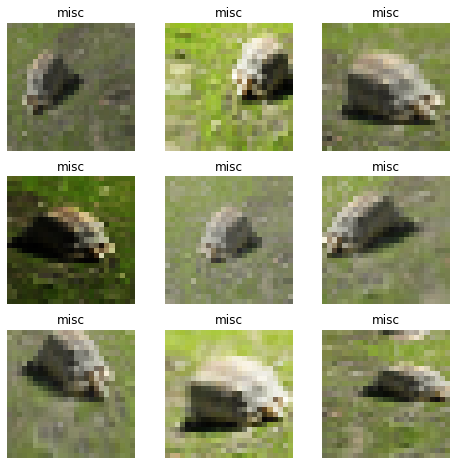

In [14]:
def _plot(i,j,ax):
    x,y = data.train_ds[5]
    x.show(ax, y=y)

    
plot_multi(_plot, 3, 3, figsize=(8,8))

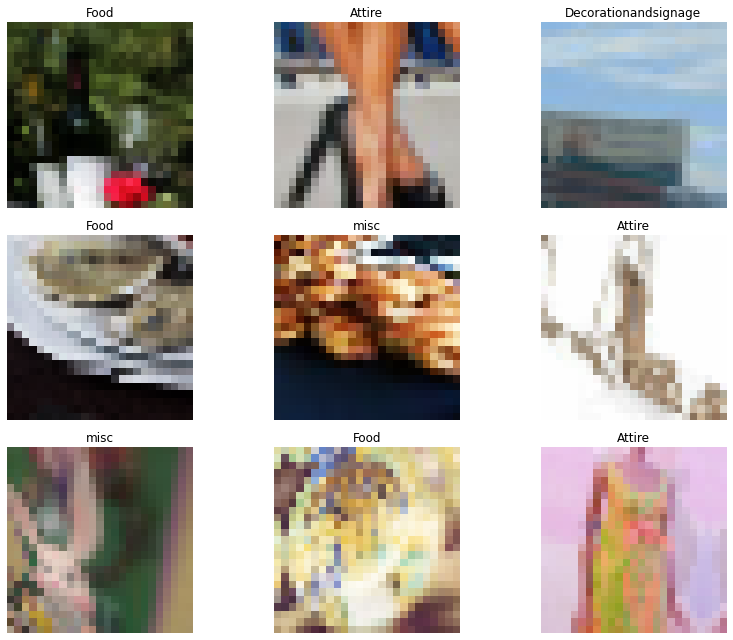

In [15]:

data.show_batch(rows=3, figsize=(12,9))

In [16]:
data.classes

['Attire', 'Decorationandsignage', 'Food', 'misc']

In [0]:
arch = models.resnet152

In [0]:
# F1 = (MultiLabelFbeta(beta=2, average="weighted"))
acc_02 = partial(accuracy_thresh, thresh=0.2)
f_score = partial(fbeta, average='weighted')

In [19]:
learn = cnn_learner(data, arch, metrics=[accuracy])

Downloading: "https://download.pytorch.org/models/resnet152-b121ed2d.pth" to /root/.cache/torch/checkpoints/resnet152-b121ed2d.pth


In [20]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


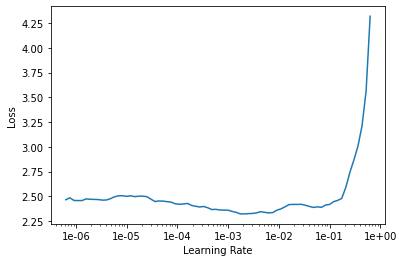

In [21]:
learn.recorder.plot()

In [22]:
learn.fit_one_cycle(7, slice(1e-2))

epoch,train_loss,valid_loss,accuracy,time
0,2.110263,3.123410,0.457358,00:13
1,1.579768,1.644921,0.484950,00:13
2,1.474704,1.831438,0.494147,00:13
3,1.332124,1.247541,0.515050,00:13
4,1.242332,1.111932,0.551003,00:13
5,1.181348,1.041060,0.563545,00:13
6,1.137030,1.110720,0.576923,00:13


In [0]:
learn.save('stage-1-rn156')

In [0]:
learn.unfreeze()

In [26]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


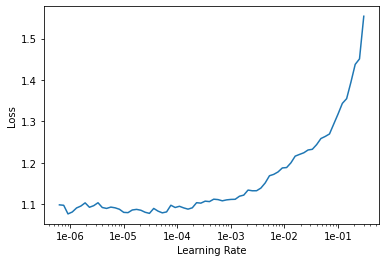

In [27]:
learn.recorder.plot()

In [28]:
lr=5e-05
learn.fit_one_cycle(6,slice(lr,lr/5))

epoch,train_loss,valid_loss,accuracy,time
0,1.111370,1.044173,0.581104,00:15
1,1.112014,1.281105,0.585284,00:15
2,1.091703,1.007291,0.602007,00:15
3,1.061879,0.975760,0.617057,00:15
4,1.059462,0.958334,0.613712,00:15
5,1.038032,0.960994,0.612876,00:15


In [0]:
learn.save('stage-2-rn101')

In [41]:
learn.load('stage-2-rn101')

Learner(data=ImageDataBunch;

Train: LabelList (4787 items)
x: ImageList
Image (3, 48, 48),Image (3, 48, 48),Image (3, 48, 48),Image (3, 48, 48),Image (3, 48, 48)
y: CategoryList
Food,misc,Attire,Food,Attire
Path: gala/dataset;

Valid: LabelList (1196 items)
x: ImageList
Image (3, 48, 48),Image (3, 48, 48),Image (3, 48, 48),Image (3, 48, 48),Image (3, 48, 48)
y: CategoryList
Attire,Food,Food,misc,Food
Path: gala/dataset;

Test: None, model=Sequential(
  (0): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (4): Sequential(
      (0): Bottleneck(
        (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (conv2): Con

In [42]:

learn.data = get_data(48)
data.train_ds[0][0].shape

torch.Size([3, 48, 48])

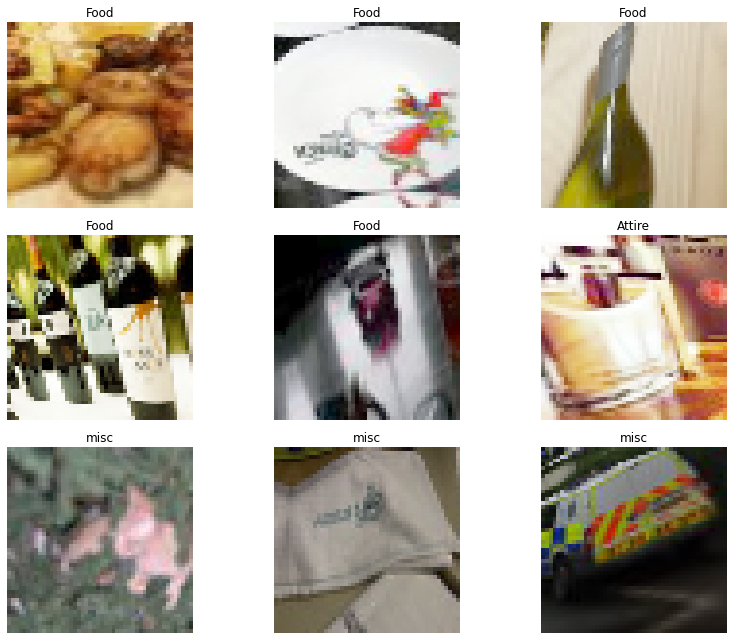

In [43]:
data.show_batch(rows=3, figsize=(12,9))

In [0]:
learn.freeze()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


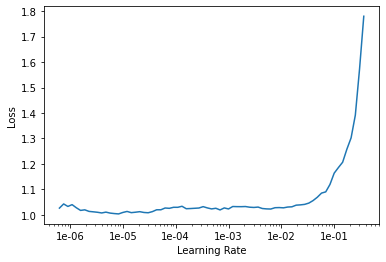

In [45]:
learn.lr_find()
learn.recorder.plot()

In [0]:
lr=1e-03

In [47]:
learn.fit_one_cycle(5, slice(lr))

epoch,train_loss,valid_loss,accuracy,time
0,1.026474,0.862807,0.671405,00:13
1,1.021105,0.828091,0.668060,00:13
2,0.951442,0.813928,0.684783,00:13
3,0.941758,0.796311,0.690635,00:13
4,0.918451,0.795831,0.687291,00:13


In [0]:
learn.unfreeze()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


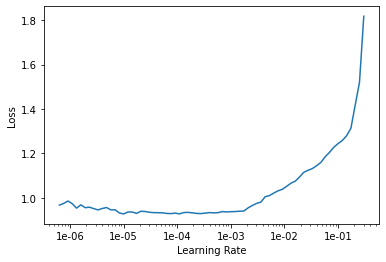

In [49]:
learn.lr_find()
learn.recorder.plot()

In [0]:
lr=1e-04

In [51]:
learn.fit_one_cycle(4, slice(lr,lr/5))

epoch,train_loss,valid_loss,accuracy,time
0,0.900314,0.765463,0.704849,00:15
1,0.849885,0.743483,0.702341,00:15
2,0.795396,0.745504,0.718227,00:15
3,0.737186,0.759523,0.720736,00:15


In [52]:

learn.data = get_data(80)
data.train_ds[0][0].shape

torch.Size([3, 80, 80])

In [0]:
learn.save('stage-3-rn101')

In [54]:
learn.load('stage-3-rn101')

Learner(data=ImageDataBunch;

Train: LabelList (4787 items)
x: ImageList
Image (3, 80, 80),Image (3, 80, 80),Image (3, 80, 80),Image (3, 80, 80),Image (3, 80, 80)
y: CategoryList
Food,misc,Attire,Food,Attire
Path: gala/dataset;

Valid: LabelList (1196 items)
x: ImageList
Image (3, 80, 80),Image (3, 80, 80),Image (3, 80, 80),Image (3, 80, 80),Image (3, 80, 80)
y: CategoryList
Attire,Food,Food,misc,Food
Path: gala/dataset;

Test: None, model=Sequential(
  (0): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (4): Sequential(
      (0): Bottleneck(
        (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (conv2): Con

In [0]:
learn.freeze()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


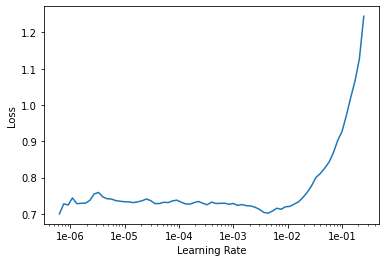

In [56]:
learn.lr_find()
learn.recorder.plot()

In [57]:
lr=1e-03
learn.fit_one_cycle(5, slice(lr))

epoch,train_loss,valid_loss,accuracy,time
0,0.661802,0.641176,0.760870,00:16
1,0.662523,0.646752,0.764214,00:15
2,0.647737,0.646725,0.770067,00:15
3,0.646349,0.607279,0.776756,00:15
4,0.621634,0.606198,0.771739,00:15


In [0]:
learn.save('stage-4-rn101')

In [0]:
# learn.load('stage-4-rn101')

In [0]:
# learn.load('stage-4-rn101')

In [0]:
learn.unfreeze()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


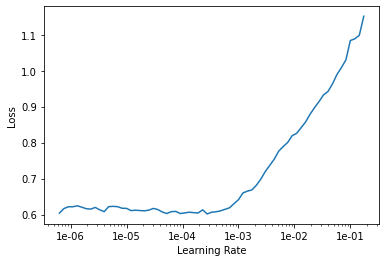

In [60]:
learn.lr_find()
learn.recorder.plot()

In [0]:
lr=1e-04

In [62]:
learn.fit_one_cycle(4, slice(lr,lr/5))

epoch,train_loss,valid_loss,accuracy,time
0,0.605773,0.597117,0.773411,00:18
1,0.577873,0.599631,0.788462,00:18
2,0.508677,0.567089,0.792642,00:19
3,0.450111,0.573840,0.790134,00:19


In [0]:
learn.save('stage-4b-rn101')

In [0]:
# learn.load('stage-4-rn101')

In [0]:
np.random.seed(42)
src = (ImageList.from_csv(path, 'train.csv', folder='Train Images')
       .split_by_rand_pct(0)
       .label_from_df()
      )

In [0]:
tfms = get_transforms(max_rotate=20, max_zoom=1.3, max_lighting=0.4, max_warp=0.4,
                      p_affine=1., p_lighting=1.)

In [0]:
def get_data(sz):
  data =  src.transform(tfms, size=sz).databunch().normalize(imagenet_stats)
  return data


In [74]:

learn.data = get_data(120)
data.train_ds[0][0].shape

torch.Size([3, 120, 120])

In [0]:
learn.freeze()

epoch,train_loss,valid_loss,accuracy,time


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


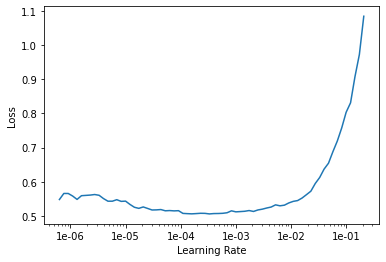

In [76]:
learn.lr_find()
learn.recorder.plot()

In [77]:
lr=6e-04
learn.fit_one_cycle(5, slice(lr))

In [0]:
learn.save('stage-5-rn156')

In [0]:
# learn.load('stage-5-rn156')

In [80]:
interp = ClassificationInterpretation.from_learner(learn)


losses,idxs = interp.top_losses()
len(data.valid_ds)==len(losses)==len(idxs)

IndexError: ignored

In [0]:
interp.plot_top_losses(9, figsize=(15,11))

In [0]:
interp.most_confused(min_val=1)

In [0]:
learn.export()

In [82]:
test = ImageList.from_csv(path, 'test.csv', folder='Test Images')
print(test[10])
learn = load_learner(path, test=test)

Image (3, 29, 80)


In [83]:
log_preds,y = learn.TTA(ds_type=DatasetType.Test)

In [84]:
log_preds.size()

torch.Size([3219, 4])

In [85]:
img = data.train_ds[0][0]
print(img)
# learn.predict(img)

Image (3, 120, 120)


In [86]:
probs = np.exp(log_preds)
probs=probs.numpy()
probs=np.argmax(probs,1)
probs[:10]
prob=[]
# prob=np.zeros(len(probs),dtype='|S6')
# len(probs)
# ['Attire', 'Decorationandsignage', 'Food', 'misc']
for i in probs:
  if(i==0):
    prob.append('Attire')
  elif(i==1):
    prob.append('Decorationandsignage')
  elif(i==2):
    prob.append('Food')   
  else:
    prob.append('misc')

prob[:10]  

['Food',
 'Attire',
 'Food',
 'Food',
 'Attire',
 'Attire',
 'Attire',
 'misc',
 'misc',
 'Attire']

In [0]:
fnames = [f[25:] for f in learn.data.test_ds.items]
# fnames=[]
# for f in learn.data.test_ds.items :
#   fnames.append(f[25:])

# fclass=[]
# for i in learn.data.test_ds : 
#   # print(i[0])
#   fclass.append(learn.predict(i[0])[0])
ds = pd.DataFrame({'Image':fnames, 'Class':prob}, columns=['Image', 'Class'])

In [88]:
ds


,Image,Class
0,image6245.jpg,Food
1,image10409.jpg,Attire
2,image8692.jpg,Food
3,image10517.jpg,Food
4,image2580.jpg,Attire
...,...,...
3214,image4968.jpg,misc
3215,image6673.jpg,Food
3216,image3442.jpg,misc
3217,image8178.jpg,misc


In [0]:
ds.to_csv(path/'submission5.csv', index=False)